# Proyecto 1 - Inteligencia de Negocios

## Nombres
- Sara Isabel Calle.
- Carlos Enrique Silva L.
- Juliana Velasco. 

## 1. Importación de Librerias

In [1]:
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [68]:
import pandas as pd
import numpy as np
import sklearn 
import seaborn as sns 
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import re, string, unicodedata
from keras.preprocessing.text import Tokenizer 
from scipy.sparse import hstack


#Importacions sklearn
from sklearn import tree as tr
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import confusion_matrix,plot_confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, Normalizer, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# Librerías de nltk que serán utilizadas.
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet') 

# Preprocesamiento de texto.
import contractions
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cesl\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cesl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\cesl\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## 2. Carga y entendimiento de los datos

In [3]:
#Cargar datos al dataframe
df_elegibilidad = pd.read_csv('clinical_trials_on_cancer_data_clasificacion.csv', sep=',', encoding = 'utf-8', na_values = '')

#Ver parte de los datos
df_elegibilidad.head()

,label,study_and_condition
0,__label__0,study interventions are Saracatinib . recurren...
1,__label__1,study interventions are Stem cell transplantat...
2,__label__0,study interventions are Lenograstim . recurren...
3,__label__0,study interventions are Doxorubicin . stage ii...
4,__label__1,study interventions are Poly I-C . prostate ca...


In [4]:
#Separar la columna study_and_condition en 2 (study, condition)
df_temp = df_elegibilidad['study_and_condition'].str.split('.', expand=True)
df_temp.head()

,0,1,2,3
0,study interventions are Saracatinib,recurrent verrucous carcinoma of the larynx d...,None,None
1,study interventions are Stem cell transplantat...,hodgkin lymphoma diagnosis and history of con...,None,None
2,study interventions are Lenograstim,recurrent adult diffuse mixed cell lymphoma d...,None,None
3,study interventions are Doxorubicin,stage iii diffuse large cell lymphoma diagnos...,None,None
4,study interventions are Poly I-C,prostate cancer diagnosis and unresolved irae...,None,None


In [5]:
#Las columnas 2 y 3 se generaron por puntos puestos o espacios, se juntan entonces las columnas 1,2,3 en una sola
df_temp.fillna(" ", inplace = True)
df_temp['label'] = df_elegibilidad['label']
df_temp['study'] = df_temp[0]
df_temp['condition'] = df_temp[1] + df_temp[2] + df_temp[3]
df_elegibilidad = df_temp.drop([0, 1, 2, 3], axis=1)
df_elegibilidad.head()

,label,study,condition
0,__label__0,study interventions are Saracatinib,recurrent verrucous carcinoma of the larynx d...
1,__label__1,study interventions are Stem cell transplantat...,hodgkin lymphoma diagnosis and history of con...
2,__label__0,study interventions are Lenograstim,recurrent adult diffuse mixed cell lymphoma d...
3,__label__0,study interventions are Doxorubicin,stage iii diffuse large cell lymphoma diagnos...
4,__label__1,study interventions are Poly I-C,prostate cancer diagnosis and unresolved irae...


In [6]:
#Ver si existen duplicados
df_elegibilidad[df_elegibilidad.duplicated(keep=False)]

,label,study,condition
645,__label__0,study interventions are Antibodies,lymphoma diagnosis and not specified
945,__label__1,"study interventions are Antibodies, Monoclonal",recurrent adult diffuse large cell lymphoma d...
996,__label__0,study interventions are Gemcitabine,ovarian cancer diagnosis and life expectancy
1099,__label__1,"study interventions are Antibodies, Monoclonal",recurrent adult diffuse large cell lymphoma d...
1176,__label__0,study interventions are Cyclophosphamide,lymphoma diagnosis and not specified
1977,__label__0,study interventions are Methylprednisolone Hem...,lymphoma diagnosis and pulmonary
2099,__label__1,study interventions are Mycophenolic Acid,recurrent grade two follicular lymphoma diagn...
2337,__label__0,study interventions are Methylprednisolone Hem...,lymphoma diagnosis and pulmonary
2929,__label__0,study interventions are Methylprednisolone,lymphoma diagnosis and prior concurrent thera...
3747,__label__0,study interventions are Docetaxel,breast cancer diagnosis and age


In [7]:
#Eliminar duplicados
df_elegibilidad = df_elegibilidad.drop_duplicates()

In [8]:
#Ver cantidad de columnas y cantidad de datos
df_elegibilidad.shape

(11988, 3)

In [9]:
#Ver tipos de labels en los datos
df_elegibilidad.label.unique()

array(['__label__0', '__label__1'], dtype=object)

In [10]:
#Ver cantidad de datos vacios
df_elegibilidad.isnull().sum()

label        0
study        0
condition    0
dtype: int64

In [11]:
#Ver tipos de datos
df_elegibilidad.dtypes

label        object
study        object
condition    object
dtype: object

<BarContainer object of 2 artists>

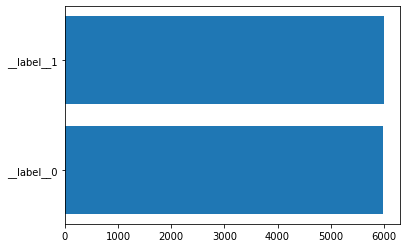

In [12]:
#Ver distribucion de labels
df_plot = df_elegibilidad['label'].value_counts().sort_values()
plt.barh(df_plot.index, df_plot.values)

## 3. Procesamiento del lenguaje natural (NLP)

### 3.1 Funciones útiles

In [13]:
# Funcion para remover caracteres no ASCII
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words


In [14]:
# Funcion para pasar todas las palabras a minuscula
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

In [15]:
#Funcion para quitar los signos de puntuacion
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

In [16]:
#Funcion para reemplazar los numeros a representacion en palabras
def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

In [17]:
#Remover los articulos, preposiciones, etc.
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words

In [18]:
#Hacer preprocesamiento con stemming
def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems


In [19]:
#Funcion para realizar el preprosesamiento 
def preprocessing(words):
    words = to_lowercase(words)
    words = replace_numbers(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    return words

### 3.2 Aplicación del procesamiento del lenguaje

In [20]:
#Quitar las contracciones de las palabras 
df_elegibilidad['study'] = df_elegibilidad['study'].apply(contractions.fix)
df_elegibilidad['condition'] = df_elegibilidad['condition'].apply(contractions.fix)

In [21]:
#Realizar el preprocesamiento definido previamente
df_elegibilidad['study'] = df_elegibilidad['study'].apply(word_tokenize).apply(preprocessing)
df_elegibilidad['condition'] = df_elegibilidad['condition'].apply(word_tokenize).apply(preprocessing)

In [22]:
#Ver ejemplo de una fila de study
df_elegibilidad['study'][0]

['study', 'interventions', 'saracatinib']

In [23]:
#Ver ejemplo de una fila de condition
df_elegibilidad['condition'][0]

['recurrent',
 'verrucous',
 'carcinoma',
 'larynx',
 'diagnosis',
 'patients',
 'must',
 'agree',
 'use',
 'adequate',
 'birth',
 'control',
 'duration',
 'study',
 'participation',
 'least',
 'eight',
 'weeks',
 'discontinuation',
 'study',
 'drug']

In [24]:
#Utilizar funciones previamente definidas para stem 
df_elegibilidad['study'] = df_elegibilidad['study'].apply(stem_words) 
df_elegibilidad['condition'] = df_elegibilidad['condition'].apply(stem_words) 

In [25]:
#Crear nueva columna con las palabras separadas por espacios
df_elegibilidad['texto_study'] = df_elegibilidad['study'].apply(lambda x: ' '.join(map(str, x)))
df_elegibilidad['texto_condition'] = df_elegibilidad['condition'].apply(lambda x: ' '.join(map(str, x)))

In [26]:
#Poner tipos de datos en string
df_elegibilidad['texto_study'] = df_elegibilidad['texto_study'].astype(str)
df_elegibilidad['texto_condition'] = df_elegibilidad['texto_condition'].astype(str)

In [27]:
#Ver parte de los datos
df_elegibilidad.head()

,label,study,condition,texto_study,texto_condition
0,__label__0,"[study, interv, saracatinib]","[recur, verruc, carcinom, larynx, diagnos, pat...",study interv saracatinib,recur verruc carcinom larynx diagnos paty must...
1,__label__1,"[study, interv, stem, cel, transpl]","[hodgkin, lymphom, diagnos, hist, congenit, he...",study interv stem cel transpl,hodgkin lymphom diagnos hist congenit hematolo...
2,__label__0,"[study, interv, lenograstim]","[recur, adult, diffus, mix, cel, lymphom, diag...",study interv lenograstim,recur adult diffus mix cel lymphom diagnos cre...
3,__label__0,"[study, interv, doxorubicin]","[stag, ii, diffus, larg, cel, lymphom, diagnos...",study interv doxorubicin,stag ii diffus larg cel lymphom diagnos stag i...
4,__label__1,"[study, interv, poly, ic]","[prost, cant, diagnos, unresolv, ira, follow, ...",study interv poly ic,prost cant diagnos unresolv ira follow pri bio...


## 4. Modelos de clasificación (ML)

### 4.1 KNN

In [28]:
#Copiar el modelo para este algoritmo
df_modeloKNN = df_elegibilidad.copy()

#Columnas necesarias
cols = ['texto_study', 'texto_condition']

In [29]:
#Pasar labels a numerico para que el modelo funcione
df_modeloKNN['label'] = df_modeloKNN.label.replace('__label__0', 0)
df_modeloKNN['label'] = df_modeloKNN.label.replace('__label__1', 1)
df_modeloKNN.head()

,label,study,condition,texto_study,texto_condition
0,0,"[study, interv, saracatinib]","[recur, verruc, carcinom, larynx, diagnos, pat...",study interv saracatinib,recur verruc carcinom larynx diagnos paty must...
1,1,"[study, interv, stem, cel, transpl]","[hodgkin, lymphom, diagnos, hist, congenit, he...",study interv stem cel transpl,hodgkin lymphom diagnos hist congenit hematolo...
2,0,"[study, interv, lenograstim]","[recur, adult, diffus, mix, cel, lymphom, diag...",study interv lenograstim,recur adult diffus mix cel lymphom diagnos cre...
3,0,"[study, interv, doxorubicin]","[stag, ii, diffus, larg, cel, lymphom, diagnos...",study interv doxorubicin,stag ii diffus larg cel lymphom diagnos stag i...
4,1,"[study, interv, poly, ic]","[prost, cant, diagnos, unresolv, ira, follow, ...",study interv poly ic,prost cant diagnos unresolv ira follow pri bio...


In [30]:
#Dividir datos con Training Set
X = df_modeloKNN[cols]
Y = df_modeloKNN['label']

In [31]:
#Vectorizar datos
vectorizer  = TfidfVectorizer()
x_v1 = vectorizer.fit_transform(X['texto_study'].tolist())
x_v2 = vectorizer.fit_transform(X['texto_condition'].tolist())
X = hstack((x_v1, x_v2))
vectorizer.get_feature_names_out()

array(['0pd', '0three_two9', '0two_two009', ..., 'zomet', 'zon', 'zubrod'],
      dtype=object)

In [32]:
#Particion
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

In [33]:
# Seleccion de hiperparametros
particiones = KFold(n_splits=10, shuffle=True, random_state = 100)
n_neighbors = list(range(2,11))
n_odd_neighbors = list(filter(lambda x: (x % 2 != 0), n_neighbors))
p=[1,2] #Función de distancia 1: manhattan, 2: euclidean, otro valor: minkowski

#Hacer el Gridsearch
hyperparameters = dict(n_neighbors=n_neighbors, p=p)
knn_2 = KNeighborsClassifier()
mejor_modelo_knn = GridSearchCV(knn_2, hyperparameters, cv=particiones)

In [34]:
#Entrenar el modelo
grid_search = mejor_modelo_knn.fit(X_train, Y_train)

In [35]:
#Imprimir los valores de los hiperparametros
print('Mejor funcion de distancia p:', grid_search.best_estimator_.get_params()['p'])
print('Mejor valor de n:', grid_search.best_estimator_.get_params()['n_neighbors'])

Mejor funcion de distancia p: 1
Mejor valor de n: 5


In [36]:
modelo_final = grid_search.best_estimator_

In [37]:
# Se reporta el F1-Score y los mejores atributos.
print('F1-Score Promedio: %.2f' % grid_search.best_score_)

F1-Score Promedio: 0.68


In [38]:
# Determinamos las predicciones del modelo sobre el conjunto test.
y_pred = modelo_final.predict(X_test)

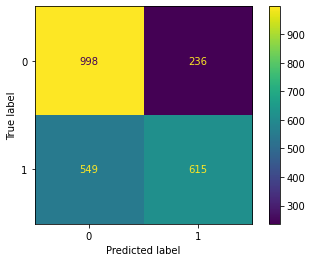

In [39]:
# Se puede visualizar la matriz de confusión
plot_confusion_matrix(modelo_final, X_test, Y_test)  
plt.show() 

In [40]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.81      0.72      1234
           1       0.72      0.53      0.61      1164

    accuracy                           0.67      2398
   macro avg       0.68      0.67      0.66      2398
weighted avg       0.68      0.67      0.67      2398



### 4.2 Decision Tree

In [41]:
#Copia del dataframe para el modelo arbol
df_tree=df_elegibilidad.copy()

In [42]:
#Pasar labels a numerico para que el modelo funcione
df_tree['label'] = df_tree.label.replace('__label__0', 0)
df_tree['label'] = df_tree.label.replace('__label__1', 1)
df_tree.head()

,label,study,condition,texto_study,texto_condition
0,0,"[study, interv, saracatinib]","[recur, verruc, carcinom, larynx, diagnos, pat...",study interv saracatinib,recur verruc carcinom larynx diagnos paty must...
1,1,"[study, interv, stem, cel, transpl]","[hodgkin, lymphom, diagnos, hist, congenit, he...",study interv stem cel transpl,hodgkin lymphom diagnos hist congenit hematolo...
2,0,"[study, interv, lenograstim]","[recur, adult, diffus, mix, cel, lymphom, diag...",study interv lenograstim,recur adult diffus mix cel lymphom diagnos cre...
3,0,"[study, interv, doxorubicin]","[stag, ii, diffus, larg, cel, lymphom, diagnos...",study interv doxorubicin,stag ii diffus larg cel lymphom diagnos stag i...
4,1,"[study, interv, poly, ic]","[prost, cant, diagnos, unresolv, ira, follow, ...",study interv poly ic,prost cant diagnos unresolv ira follow pri bio...


In [43]:
#Creación de Target para el modelo
X = df_tree.drop('label', axis = 1)
Y = df_tree['label']

In [44]:
#Vectorizar datos
vectorizer  = TfidfVectorizer()
x_v1 = vectorizer.fit_transform(X['texto_study'].tolist())
x_v2 = vectorizer.fit_transform(X['texto_condition'].tolist())
X = hstack((x_v1, x_v2))
vectorizer.get_feature_names_out()

array(['0pd', '0three_two9', '0two_two009', ..., 'zomet', 'zon', 'zubrod'],
      dtype=object)

In [45]:
#Partición para el entrenamiento y prueba de datos 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

In [46]:
# Fijemos el número de particiones. Utilizaremos K = 10
particiones = KFold(n_splits=10, shuffle=True, random_state = 0)
# Establecemos el espacio de búsqueda para los hiperparámetros que deseamos ajustar. 
param_grid = {'criterion':['gini', 'entropy'],'max_depth':[100,300,500],'min_samples_split':[2, 3, 4]}
arbol = DecisionTreeClassifier(random_state=100)
# Ahora utilizamos GridSearch sobre el grid definido y con 10 particiones en la validación cruzada.
mejor_modelo = GridSearchCV(arbol, param_grid, cv=particiones)
# Ajuste del modelo
mejor_modelo.fit(X_train, Y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [100, 300, 500],
                         'min_samples_split': [2, 3, 4]})

In [47]:
final_model = mejor_modelo.best_estimator_
final_model

DecisionTreeClassifier(max_depth=100, min_samples_split=4, random_state=100)

In [48]:
# Se reporta el F1-Score y los mejores atributos.
print('F1-Score Promedio: %.2f' % mejor_modelo.best_score_)
print('Mejores Atributos')
pd.DataFrame.from_dict(mejor_modelo.best_params_, orient='index')

F1-Score Promedio: 0.73
Mejores Atributos


,0
criterion,gini
max_depth,100
min_samples_split,4


In [49]:
# Determinamos las predicciones del modelo sobre el conjunto test.
y_pred = mejor_modelo.predict(X_test)

In [50]:
# Se genera la matriz de confusión
confusion_matrix(Y_test, y_pred)

array([[921, 313],
       [305, 859]], dtype=int64)

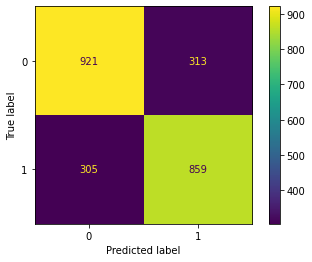

In [51]:
# Se puede visualizar la matriz de confusión
plot_confusion_matrix(mejor_modelo, X_test, Y_test)  
plt.show()  

In [52]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75      1234
           1       0.73      0.74      0.74      1164

    accuracy                           0.74      2398
   macro avg       0.74      0.74      0.74      2398
weighted avg       0.74      0.74      0.74      2398



### 4.3 Random Forest

In [53]:
#Copia del dataframe para el modelo Random Forest
df_rf = df_elegibilidad.copy()

In [54]:
#Pasar labels a numerico para que el modelo funcione
df_rf['label'] = df_rf.label.replace('__label__0', 0)
df_rf['label'] = df_rf.label.replace('__label__1', 1)
df_rf.head()

,label,study,condition,texto_study,texto_condition
0,0,"[study, interv, saracatinib]","[recur, verruc, carcinom, larynx, diagnos, pat...",study interv saracatinib,recur verruc carcinom larynx diagnos paty must...
1,1,"[study, interv, stem, cel, transpl]","[hodgkin, lymphom, diagnos, hist, congenit, he...",study interv stem cel transpl,hodgkin lymphom diagnos hist congenit hematolo...
2,0,"[study, interv, lenograstim]","[recur, adult, diffus, mix, cel, lymphom, diag...",study interv lenograstim,recur adult diffus mix cel lymphom diagnos cre...
3,0,"[study, interv, doxorubicin]","[stag, ii, diffus, larg, cel, lymphom, diagnos...",study interv doxorubicin,stag ii diffus larg cel lymphom diagnos stag i...
4,1,"[study, interv, poly, ic]","[prost, cant, diagnos, unresolv, ira, follow, ...",study interv poly ic,prost cant diagnos unresolv ira follow pri bio...


In [55]:
#Creación de Target para el modelo
X = df_rf.drop('label', axis = 1)
Y = df_rf['label']

In [56]:
#Vectorizar datos
vectorizer1  = TfidfVectorizer()
vectorizer2  = TfidfVectorizer()
x_v1 = vectorizer1.fit_transform(X['texto_study'].tolist())
x_v2 = vectorizer2.fit_transform(X['texto_condition'].tolist())
X = hstack((x_v1, x_v2))

arr1 = vectorizer1.get_feature_names_out()
arr2 = vectorizer2.get_feature_names_out()
arr3 = np.concatenate((arr1, arr2))

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

In [58]:
#Ahora, buscaremos mejorar el modelo encontrar mejores hiperparametros 
#Buscar Hiperparametros
particiones = KFold(n_splits=10, shuffle=True, random_state = 0)

# Establecemos el espacio de búsqueda para los hiperparámetros que deseamos ajustar. 
param_grid = {'criterion':['gini', 'entropy'],'max_depth':[100,300,500],'n_estimators':[30,50,80]}


#Crear el modelo
model_rf_hp = RandomForestClassifier()

In [59]:
# Ahora utilizamos GridSearch sobre el grid definido y con 10 particiones en la validación cruzada.
mejor_modelo = GridSearchCV(model_rf_hp, param_grid, cv=particiones)
# Ajuste del modelo
mejor_modelo.fit(X_train, Y_train)

#Podemos ver cuál fue el resultado de la búsqueda (mejores valores de hiperparámetros)
print('F1-Score Promedio: %.2f' % mejor_modelo.best_score_)
print('Mejores Atributos')
pd.DataFrame.from_dict(mejor_modelo.best_params_, orient='index')

F1-Score Promedio: 0.81
Mejores Atributos


,0
criterion,gini
max_depth,500
n_estimators,80


In [60]:
# Determinamos las predicciones del modelo sobre el conjunto test.
y_pred = mejor_modelo.predict(X_test)

In [61]:
# Se genera la matriz de confusión
confusion_matrix(Y_test, y_pred)

array([[965, 269],
       [210, 954]], dtype=int64)

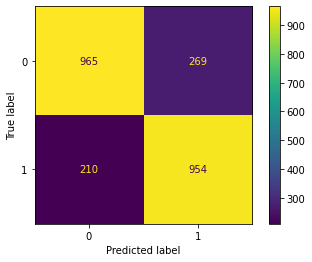

In [62]:
# Se puede visualizar la matriz de confusión
plot_confusion_matrix(mejor_modelo, X_test, Y_test)  
plt.show() 

In [63]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1234
           1       0.78      0.82      0.80      1164

    accuracy                           0.80      2398
   macro avg       0.80      0.80      0.80      2398
weighted avg       0.80      0.80      0.80      2398



In [67]:
finalModel = mejor_modelo.best_estimator_
importancia = finalModel.feature_importances_
importancia_atributo = pd.DataFrame(data={"Atributo": arr3,"Importancia": importancia})
importancia_atributo = importancia_atributo.sort_values(by='Importancia', ascending=False).reset_index(drop=True)
importancia_atributo.head(10)

,Atributo,Importancia
0,diagnos,0.023052
1,must,0.019049
2,interv,0.014903
3,study,0.014840
4,hist,0.012662
5,cant,0.012002
6,tre,0.009634
7,lymphom,0.009522
8,paty,0.009205
9,least,0.007669


## 5. Exportar datos a excel para tablero de control

In [65]:
df_elegibilidad.to_excel('datosTableroDeControl.xlsx')

In [66]:
#Resultados de RandomForest
data = {'Metric':['0','1','Macro Average','Weighted Average'], 'Precision':['0.82','0.78','0.80','0.80'], 'Recall':['0.78','0.82','0.80','0.80'], 'F1-Score':['0.80','0.80','0.80','0.80']}

df_resultados = pd.DataFrame(data)  
df_resultados.to_excel('datosTableroDeControlResultados.xlsx')